In [1]:
## Ejemplo 1

In [12]:
using Random, Plots, Distributions

In [40]:
p_true= 0.7
n= 0:100

0:100

In [41]:
Random.seed!(123)
data= rand(Bernoulli(p_true), last(n))
data[1:5]

5-element Array{Bool,1}:
 0
 0
 1
 1
 1

In [42]:
prior_belief= Beta(1,6)

Beta{Float64}(α=1.0, β=6.0)

┌ Info: Saved animation to 
│   fn = /home/doppelganger/Gitlab/Intro_Julia/tmp.gif
└ @ Plots /home/doppelganger/.julia/packages/Plots/AJMX6/src/animation.jl:114


Plots.AnimatedGif("/home/doppelganger/Gitlab/Intro_Julia/tmp.gif")
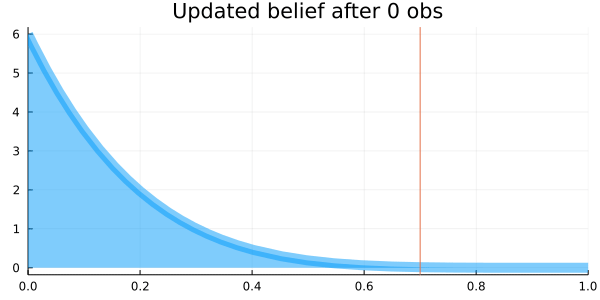

In [43]:
using StatsPlots

animation= @gif for (i, N) in enumerate(n)
    heads= sum(data[1:i-1])
    tails= N - heads
    
    update_belief= Beta(prior_belief.α + heads, prior_belief.β + tails)
    
    plot(update_belief,
        size= (600,300),
        title= "Updated belief after $N obs",
        xlim=(0,1),
        legend= nothing,
        fill=0, α=0.5, w=10)
    vline!([p_true])
    
end

In [44]:
using Turing, MCMCChains

In [46]:
@model function coinflip(y)
    p ~ Beta(1,1)
    
    N= length(y)
    for n in 1:N
        y[n] ~ Bernoulli(p)
    end
end;

In [49]:
iter= 10000

ϵ= 0.05
τ= 10

chain= sample(coinflip(data), HMC(ϵ,τ), iter, progress= true)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (10000×10×1 Array{Float64,3}):

Iterations        = 1:1:10000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 0.66 seconds
Compute duration  = 0.66 seconds
parameters        = p
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat   ⋯
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64   ⋯

           p    0.6473    0.0470     0.0005    0.0002   76391.9517    0.9999   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           p    0.5541    0.6159    0.6487    0.6795    0.7363


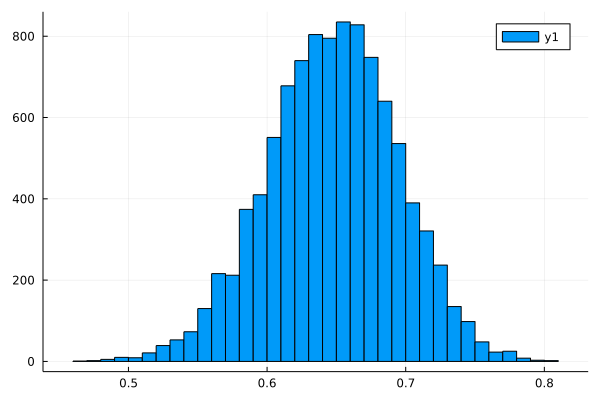

In [50]:
p_summary= chain[:p]

plot(p_summary, seriestype= :histogram)

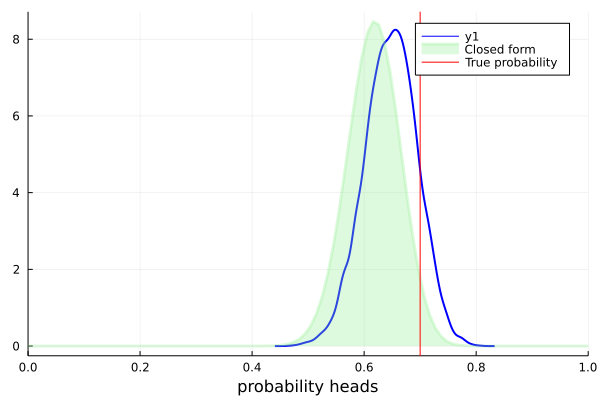

In [51]:
using StatsPlots
N= length(data)

heads= sum(data)
tails= N- heads
update_beliefs= Beta(prior_belief.α + heads, prior_belief.β + tails)

p= plot(p_summary, 
    seriestype= :density,
    xlim= (0,1),
    legend= :best,
    w=2,
    c= :blue
)

plot!(p, 
    range(0, stop=1, length=100),
    pdf.(Ref(update_beliefs), range(0, stop= 1, length= 100)),
    xlabel= "probability heads",
    xlim= (0,1),
    label= "Closed form",
    fill=0, α= 0.3, w=3, c= :lightgreen
    )

vline!(p, [p_true], label= "True probability", c=:red)
        